# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('airbnb_hw.csv')

In [137]:
df2 = df.dropna()

In [138]:
df2.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [139]:
df2['Host Since'] = pd.to_datetime(df2['Host Since'])
df2['Host Since'].unique()

<ipython-input-139-47f0977d649e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Host Since'] = pd.to_datetime(df2['Host Since'])


<DatetimeArray>
['2008-06-26 00:00:00', '2008-07-25 00:00:00', '2008-08-12 00:00:00',
 '2008-08-15 00:00:00', '2008-08-20 00:00:00', '2008-08-27 00:00:00',
 '2008-09-06 00:00:00', '2008-09-09 00:00:00', '2008-09-10 00:00:00',
 '2008-09-14 00:00:00',
 ...
 '2015-08-14 00:00:00', '2015-08-15 00:00:00', '2015-08-17 00:00:00',
 '2015-08-18 00:00:00', '2015-08-19 00:00:00', '2015-08-20 00:00:00',
 '2015-08-21 00:00:00', '2015-08-24 00:00:00', '2015-08-25 00:00:00',
 '2015-08-27 00:00:00']
Length: 2199, dtype: datetime64[ns]

In [140]:
df2['Neighbourhood '].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [141]:
room_dummies = pd.get_dummies(df2['Room Type'], prefix='room', drop_first=False)
df2 = pd.concat([df2, room_dummies], axis=1)


In [142]:
df2

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,room_Entire home/apt,room_Private room,room_Shared room
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,False,True,False
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0,True,False,False
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0,True,False,False
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0,False,True,False
8,2339,2008-08-20,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30332,42349033,2015-08-24,Cute cozy studio in east village,Manhattan,Apartment,100.0,Entire home/apt,10003.0,1.0,1,1,90,100.0,True,False,False
30347,42430249,2015-08-24,Room in new spacious loft!,Brooklyn,Apartment,80.0,Private room,11222.0,1.0,1,1,65,80.0,False,True,False
30378,42518458,2015-08-25,Williamsburg Luxury Loft!??Bed Top,Brooklyn,Loft,100.0,Shared room,11206.0,1.0,1,1,55,100.0,False,False,True
30404,42697124,2015-08-27,"Cute, Clean Room- East Williamsburg",Brooklyn,Apartment,100.0,Private room,11206.0,1.0,1,1,60,100.0,False,True,False


In [143]:
from sklearn.preprocessing import LabelEncoder

df2['Neighbourhood '] = LabelEncoder().fit_transform(df2['Neighbourhood '])
df2['Property Type'] = LabelEncoder().fit_transform(df2['Property Type'])
df2['Room Type'] = LabelEncoder().fit_transform(df2['Room Type'])

In [144]:
df2['Price'] = df2['Price'].str.replace(',', '').astype(float)

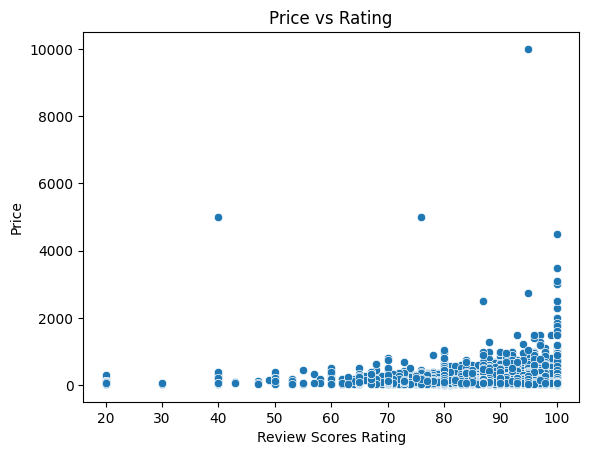

In [145]:
sns.scatterplot(x='Review Scores Rating', y='Price', data=df2)
plt.title('Price vs Rating')
plt.show()

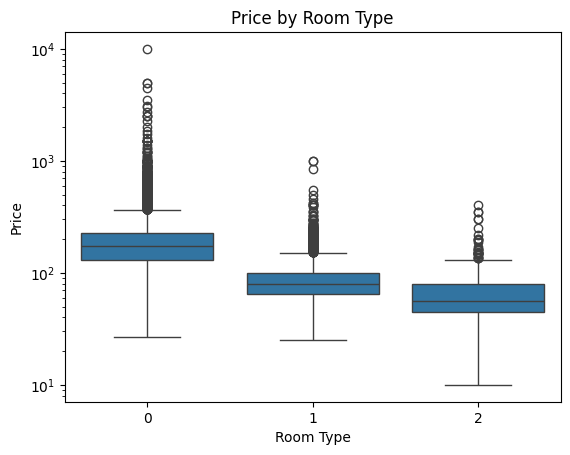

In [146]:
sns.boxplot(x='Room Type', y='Price', data=df2)
plt.title('Price by Room Type')
plt.yscale('log')
plt.show()

In [147]:
le = LabelEncoder()
le.fit(df['Room Type'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Entire home/apt': np.int64(0),
 'Private room': np.int64(1),
 'Shared room': np.int64(2)}

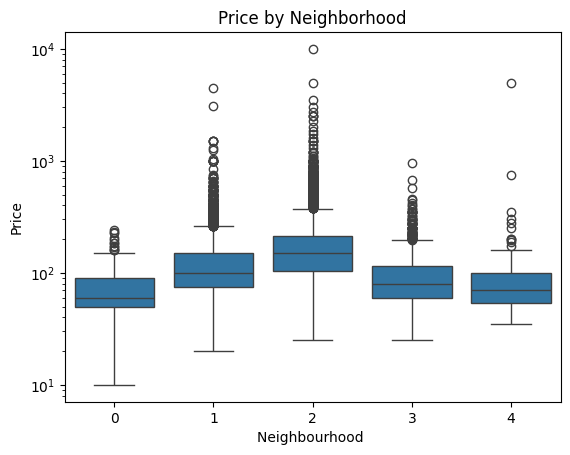

In [148]:
sns.boxplot(x='Neighbourhood ', y='Price', data=df2)
plt.title('Price by Neighborhood')
plt.yscale('log')
plt.show()

In [149]:
le.fit(df['Neighbourhood '])
dict(zip(le.classes_, le.transform(le.classes_)))

{'Bronx': np.int64(0),
 'Brooklyn': np.int64(1),
 'Manhattan': np.int64(2),
 'Queens': np.int64(3),
 'Staten Island': np.int64(4)}

In [150]:
#df2['log_price'] = np.log1p(df2['Price'])

In [151]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df2, test_size=0.2, random_state=42)

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Number of Records', 'Number Of Reviews', 'Review Scores Rating']

train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
features_1 = ['Room Type']
X_train1 = pd.get_dummies(train_df[features_1], drop_first=True)
X_test1 = pd.get_dummies(test_df[features_1], drop_first=True)

In [155]:
features_2 = ['Beds']
X_train2 = pd.get_dummies(train_df[features_2], drop_first=True)
X_test2 = pd.get_dummies(test_df[features_2], drop_first=True)

In [156]:
features_3 = ['Review Scores Rating']
X_train3 = pd.get_dummies(train_df[features_3], drop_first=True)
X_test3 = pd.get_dummies(test_df[features_3], drop_first=True)

In [157]:
X_train1, X_test1 = X_train1.align(X_test1, join='left', axis=1, fill_value=0)

y_train = np.log1p(train_df['Price'])
y_test = np.log1p(test_df['Price'])

model1 = LinearRegression()
model1.fit(X_train1, y_train)

y_train_pred1 = model1.predict(X_train1)
y_test_pred1 = model1.predict(X_test1)


rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)

print('Feature 1, Room Type\n\n')
print('RMSE Train:', rmse_train1)
print('RMSE Test:', rmse_test1)
print('R2 Train:', r2_train1)
print('R2 Test:', r2_test1)

Feature 1, Room Type


RMSE Train: 0.4328704128030438
RMSE Test: 0.43481788193046517
R2 Train: 0.44434884617135806
R2 Test: 0.44692433122103725


In [158]:
X_train2, X_test2 = X_train2.align(X_test2, join='left', axis=1, fill_value=0)

y_train = np.log1p(train_df['Price'])
y_test = np.log1p(test_df['Price'])

model2 = LinearRegression()
model2.fit(X_train2, y_train)

y_train_pred2 = model2.predict(X_train2)
y_test_pred2 = model2.predict(X_test2)


rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)

print('Feature 2, Beds\n\n')
print('RMSE Train:', rmse_train2)
print('RMSE Test:', rmse_test2)
print('R2 Train:', r2_train2)
print('R2 Test:', r2_test2)

Feature 2, Beds


RMSE Train: 0.5301722101941455
RMSE Test: 0.5366205719354968
R2 Train: 0.1664717271441064
R2 Test: 0.1576270811912437


In [159]:
X_train3, X_test3 = X_train3.align(X_test3, join='left', axis=1, fill_value=0)

y_train = np.log1p(train_df['Price'])
y_test = np.log1p(test_df['Price'])

model3 = LinearRegression()
model3.fit(X_train3, y_train)

y_train_pred3 = model3.predict(X_train3)
y_test_pred3 = model3.predict(X_test3)


rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)

print('Feature 3, Review Scores Rating\n\n')
print('RMSE Train:', rmse_train3)
print('RMSE Test:', rmse_test3)
print('R2 Train:', r2_train3)
print('R2 Test:', r2_test3)

Feature 3, Review Scores Rating


RMSE Train: 0.5769221483476868
RMSE Test: 0.5803105071802142
R2 Train: 0.012991619783118802
R2 Test: 0.014876614302960944


In [160]:
np.log1p(df2['Price']).mean()

np.float64(4.860003729377639)

In [161]:
# ROOM TYPE MODEL PERFORMED THE BEST

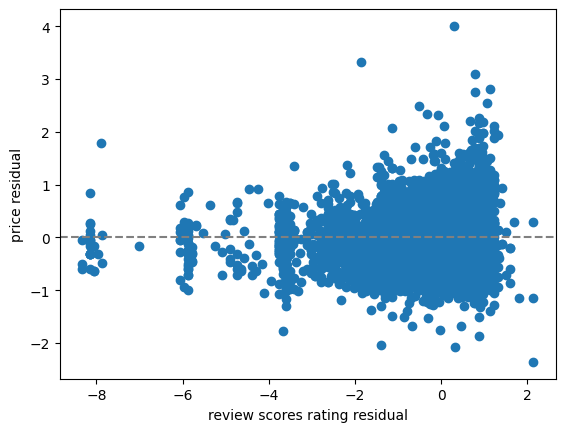

In [162]:
X_partial = train_df[['Beds', 'Room Type']]
y = np.log1p(train_df['Price'])
X_target = train_df[['Review Scores Rating']]

model_resid = LinearRegression().fit(X_partial, y)
resid_y = y - model_resid.predict(X_partial)

model_var = LinearRegression().fit(X_partial, X_target)
resid_x = X_target - model_var.predict(X_partial)

plt.xlabel('review scores rating residual')
plt.ylabel('price residual')

plt.scatter(resid_x, resid_y)
plt.axhline(0, color='gray', linestyle='--')
plt.show()

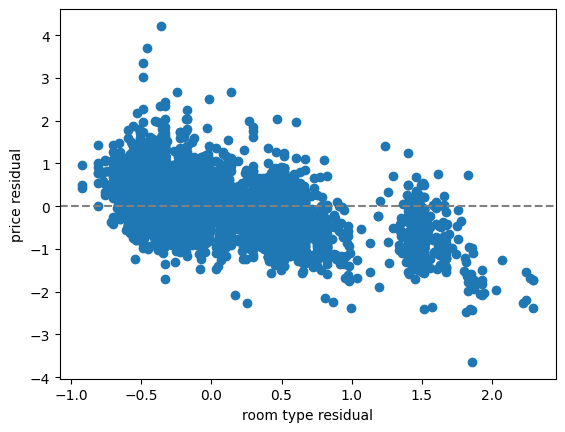

In [163]:
X_partial = train_df[['Beds', 'Review Scores Rating']]
y = np.log1p(train_df['Price'])
X_target = train_df[['Room Type']]

model_resid = LinearRegression().fit(X_partial, y)
resid_y = y - model_resid.predict(X_partial)

model_var = LinearRegression().fit(X_partial, X_target)
resid_x = X_target - model_var.predict(X_partial)

plt.xlabel('room type residual')
plt.ylabel('price residual')

plt.scatter(resid_x, resid_y)
plt.axhline(0, color='gray', linestyle='--')
plt.show()

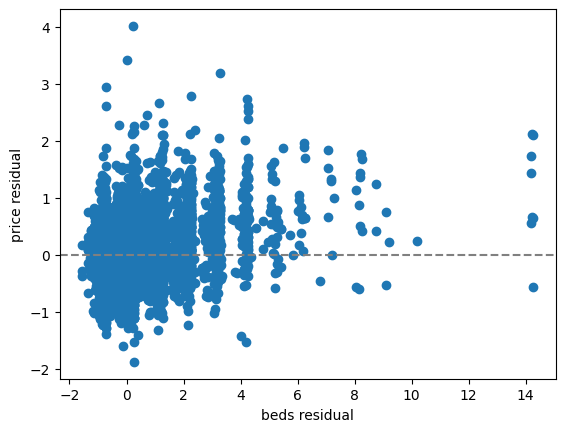

In [164]:
X_partial = train_df[['Room Type', 'Review Scores Rating']]
y = np.log1p(train_df['Price'])
X_target = train_df[['Beds']]

model_resid = LinearRegression().fit(X_partial, y)
resid_y = y - model_resid.predict(X_partial)

model_var = LinearRegression().fit(X_partial, X_target)
resid_x = X_target - model_var.predict(X_partial)

plt.xlabel('beds residual')
plt.ylabel('price residual')

plt.scatter(resid_x, resid_y)
plt.axhline(0, color='gray', linestyle='--')
plt.show()

In [165]:
#review scores and beds didn't have much or any linearity
#Room type had downward trend which aligns with its model performing the best

In [166]:
df2['log_beds'] = np.log1p(df2['Beds'])
df2['centered_reviews'] = df2['Review Scores Rating'] - df2['Review Scores Rating'].mean()



In [167]:
room_dummies = pd.get_dummies(df2['Room Type'], drop_first=True)


In [168]:
df2['beds_x_private'] = df2['log_beds'] * df2['room_Private room']
df2['beds_x_shared'] = df2['log_beds'] * df2['room_Shared room']
df2['beds_x_entire'] = df2['log_beds'] * df2['room_Entire home/apt']


In [169]:
train_df, test_df = train_test_split(df2, test_size=0.2, random_state=42)

In [170]:
scaler = StandardScaler()
numeric_cols = ['log_beds', 'centered_reviews', 'beds_x_shared', 'beds_x_private', 'beds_x_entire']

train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [171]:
features_4 = ['log_beds', 'centered_reviews', 'beds_x_shared', 'beds_x_private', 'beds_x_entire']

In [172]:
features_4

['log_beds',
 'centered_reviews',
 'beds_x_shared',
 'beds_x_private',
 'beds_x_entire']

In [173]:
X_train4 = pd.get_dummies(train_df[features_4], drop_first=True)
X_test4 = pd.get_dummies(test_df[features_4], drop_first=True)

In [174]:
X_train4, X_test4 = X_train4.align(X_test4, join='left', axis=1, fill_value=0)

y_train = np.log1p(train_df['Price'])
y_test = np.log1p(test_df['Price'])

model4 = LinearRegression()
model4.fit(X_train4, y_train)

y_train_pred4 = model4.predict(X_train4)
y_test_pred4 = model4.predict(X_test4)


rmse_train4 = np.sqrt(mean_squared_error(y_train, y_train_pred4))
rmse_test4 = np.sqrt(mean_squared_error(y_test, y_test_pred4))
r2_train4 = r2_score(y_train, y_train_pred4)
r2_test4 = r2_score(y_test, y_test_pred4)

print('Feature 4, Complex')
print('RMSE Train:', rmse_train4)
print('RMSE Test:', rmse_test4)
print('R2 Train:', r2_train4)
print('R2 Test:', r2_test4)

Feature 4, Complex
RMSE Train: 0.40964923770977985
RMSE Test: 0.4101386875547214
R2 Train: 0.5023652289794467
R2 Test: 0.5079250744199291


In [175]:
'''
Findings from 1-6:

I focused on the features beds, review_scores_rating, and room_type
I encoded room_type as 0, 1, and 2 for 'Entire home/apt', 'Private room', and 'Shared room'
Out of the simple models, this was the only one that performed decently
the others didn’t explain much of the variation in price


For the complex model, I log-transformed beds since it was skewed, and I centered review_scores_rating
I also added interaction terms for beds × room_type(each type) because i thought the impact of beds
might depend on the type of room and that actually helped
RMSE dropped a bit, and the R² improved a lot, explaining over 50% of the variation in price

What I learned about overfitting, underfitting, and model selection is that simple models
can underfit and miss important patterns while more complex models are capable of
performing better as long as they are not overfitting. (test by making sure train and test results are similar)
'''


"\nFindings from 1-6:\n\nI focused on the features beds, review_scores_rating, and room_type\nI encoded room_type as 0, 1, and 2 for 'Entire home/apt', 'Private room', and 'Shared room'\nOut of the simple models, this was the only one that performed decently \nthe others didn’t explain much of the variation in price\n\n\nFor the complex model, I log-transformed beds since it was skewed, and I centered review_scores_rating\nI also added interaction terms for beds × room_type(each type) because i thought the impact of beds\nmight depend on the type of room and that actually helped\nRMSE dropped a bit, and the R² improved a lot, explaining over 50% of the variation in price\n\nWhat I learned about overfitting, underfitting, and model selection is that simple models \ncan underfit and miss important patterns while more complex models are capable of \nperforming better as long as they are not overfitting. (test by making sure train and test results are similar)\n"

In [176]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42).fit(X_train4, y_train)


y_train_pred = lasso.predict(X_train4)
y_test_pred = lasso.predict(X_test4)


rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)
print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)


RMSE Train: 0.16781297391289893
RMSE Test: 0.16822748668984536
R2 Train:  0.502363817567282
R2 Test:  0.5078848701493857


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e+00, tolerance: 5.938e-01
  model = cd_fast.enet_coordinate_descent(
